In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(r'C:\Users\chira\Downloads\Dataset_Task3.csv')
print("It works")

It works


Dropped the 'Duration' column.
Data split successfully.
Decision Tree model has been trained!

Generating the decision tree visualization...
Decision tree visualization saved as 'decision_tree_simple.png'

Visualization complete.


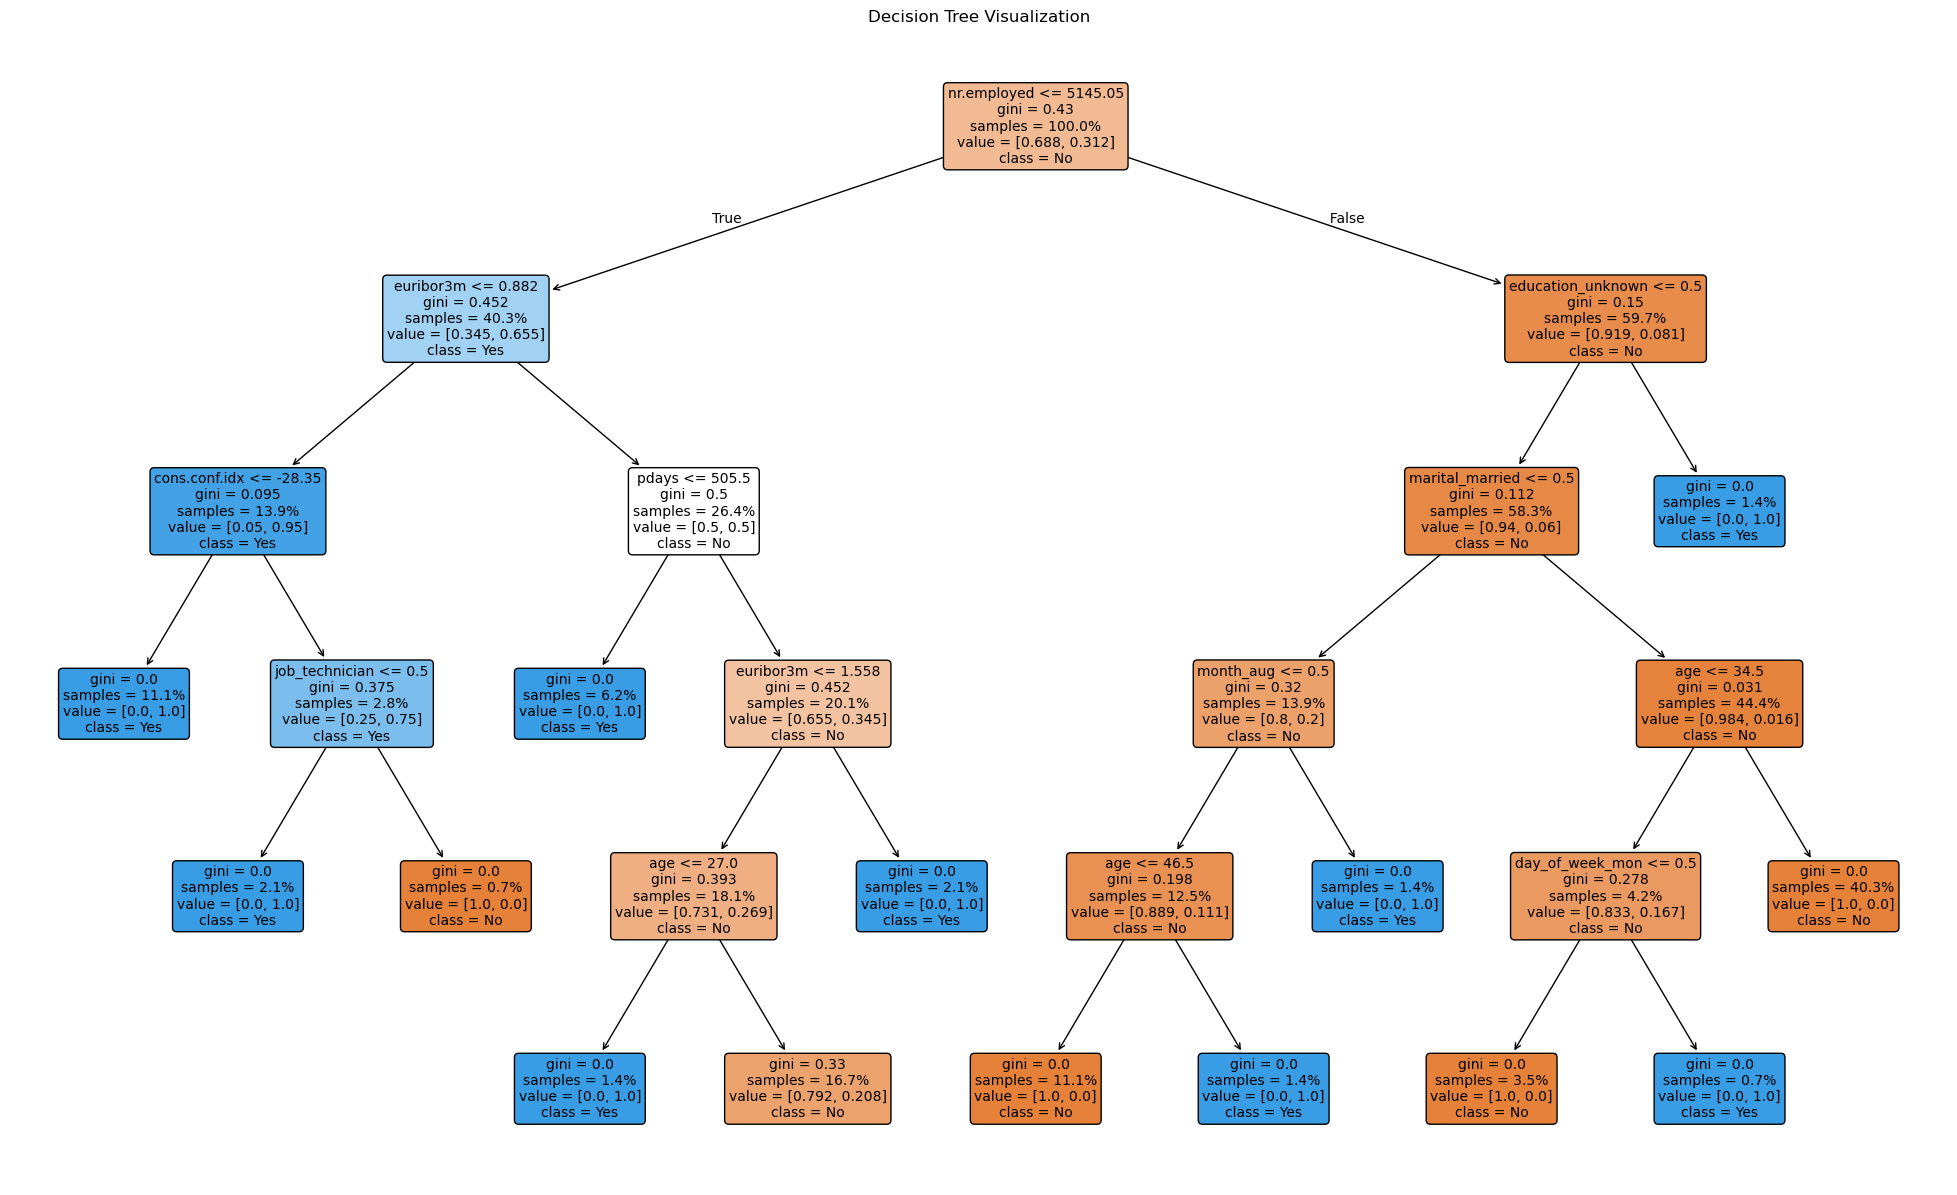

In [3]:
df = df.drop('duration', axis=1)
print("Dropped the 'Duration' column.")

X = df.drop('y', axis=1)
y = df['y']
X = pd.get_dummies(X, drop_first=True)

le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Data split successfully.")

clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train, y_train)
print("Decision Tree model has been trained!")
print("\nGenerating the decision tree visualization...")
plt.figure(figsize=(25, 15))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True,
    proportion=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.savefig("decision_tree_simple.png")
print("Decision tree visualization saved as 'decision_tree_simple.png'")
print("\nVisualization complete.")

<Figure size 600x600 with 0 Axes>

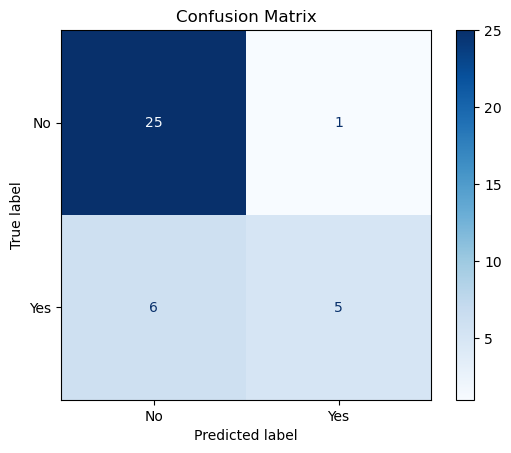

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])

plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()